In [23]:
from jax import vmap
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

import bayes_ca.inference as core

In [32]:
def _calculate_f_g(mu_0, mu_n):
    """"""
    log_normalizer, _, _, E_mu_n = core.gaussian_cp_smoother(
        mu_0, hazard_rates, mu_pri, sigmasq_pri, sigmasq_subj
    )
    f = -0.5 / sigmasq_subj * jnp.sum((mu_n - mu_0) ** 2) - log_normalizer
    g = 1 / sigmasq_subj * (mu_n - E_mu_n)
    return f, g

Text(0, 0.5, '$f$')

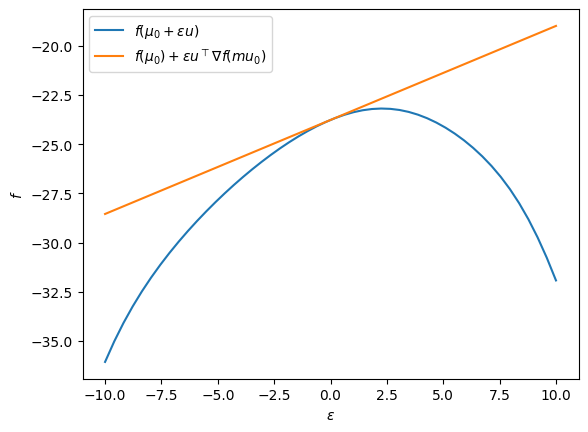

In [33]:
key = jr.PRNGKey(1234)
k1, k2 = jr.split(key, 2)

# Randomly create global and single subject means
mu0 = jr.normal(k1, (num_timesteps, num_features))
mun = subj_means[0]

# Pick a random direction in which to visualize the gradient
u = jr.normal(k2, (num_timesteps, num_features))
u /= jnp.sqrt(jnp.sum(u**2))

# evaluate the function at a grid of points along this direction
eps = jnp.linspace(-10, 10)
f_true = vmap(lambda e: _calculate_f_g(mu0 + e * u, mun)[0])(eps)

# evaluate the first order taylor approximation along this direction
f0, g0 = _calculate_f_g(mu0, mun)
f_approx = vmap(lambda e: f0 + jnp.sum(e * u * g0))(eps)

plt.plot(eps, f_true, label=r"$f(\mu_0 + \epsilon u)$")
plt.plot(eps, f_approx, label=r"$f(\mu_0) + \epsilon u^\top \nabla f(mu_0)$")
plt.legend()
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$f$")